<a href="https://colab.research.google.com/github/JSheleg/ut_austin_aiml_cert/blob/main/INN_Learner_Notebook_Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you pr

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bank = pd.read_csv('/content/drive/MyDrive/UT_Austin_ML/neural_networks/project4_bank_churn_predictions/bank-1.csv')

## Data Overview

In [5]:
# First 5 rows
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Last 5 rows
bank.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Data shape
print(f"The dataset has {bank.shape[0]} rows and {bank.shape[1]} columns")

The dataset has 10000 rows and 14 columns


In [8]:
# info of data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 14 columns with 10000 rows of data.
* Datatypes include numerical and object
* `Surname`, `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`, `NumOfProducts` and `Exited` look to be categorical.

In [9]:
# Statistical Summary
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
# convert stat values
pd.options.display.float_format = '{:.2f}'.format

In [11]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


* `RowNumber`, `CustomerId` look to be unique
* `CreditScore` has a max of 850 and a min of 350 with an average of 650 and a 50% quantile of 652. This may a indicate a relatively normal distribution
* `Age` has a minimum of 18 and a max of 92 with an average of 38.92
* `Tenure` has a minimum of 5.01 and a max of 10
* `Balance` has a min of 0 and a max of 97198.54 with an average of 76485.89 and a 50% quantile of 97198.54. This indicates a left skewed distribution
* `NumOfProducts` has a max of 4 and minimum of 1. This feature is how many products a customer has, so a mean of 1.53 is not possible. This might be better of as a categorical variable
* `HasCrCard` is a categorical variable of either 0 (no) or 1 (yes) and should be updated as such
* `IsActiveMember` is a categorical variable of either 0(no) or 1(yes) and should be updated as such
* `EstimatedSalary` has a minimum of 11.58 and a max of 199,992.48 and an average of 100,090.24. With minimum being so low, this might be an error.
* `Exited` is a categorical variable of either 0(no) or 1(yes) for customers who have left the bank in the last 6 months. This will be the Target variable.

In [12]:
# missing values
bank.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


* There is no missing values

In [13]:
# Checking for unique values for each column
bank.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


* `RowNumber`, `CustomerId` and `Surname` are unique, hence dropping

In [14]:
# make copy of bank dataframe
df = bank.copy()

In [15]:
# drop unique column
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
# revised statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [18]:
# stat summary for columns with type object
df.describe(include=["object"]).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [19]:
# convert Geography and Gender to category from type object
cat_cols = ['Geography', 'Gender']
df[cat_cols] = df[cat_cols].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


## Exploratory Data Analysis

### Univariate Analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

 #### `CreditScore`



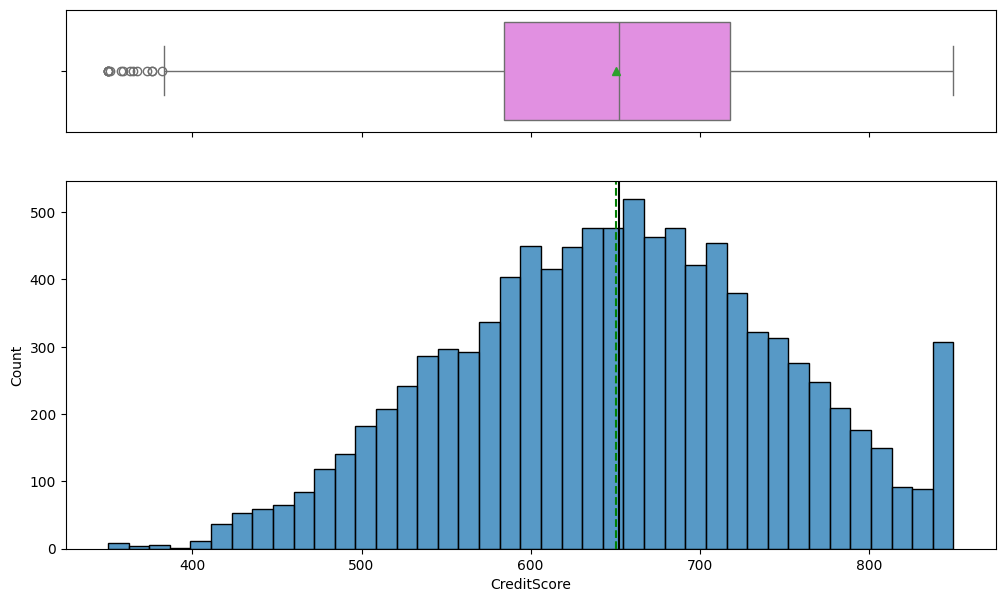

In [23]:
histogram_boxplot(df, 'CreditScore')

* The average `Credit Score` looks to be about 650.
* The largest number of customers (500) have a `Credit Score` around 665.
* Mean and 50% quantile seem to be very close, but there seems to be a few outliers on the left side and the distribution seems to be slightly left skewed

 #### `Age`

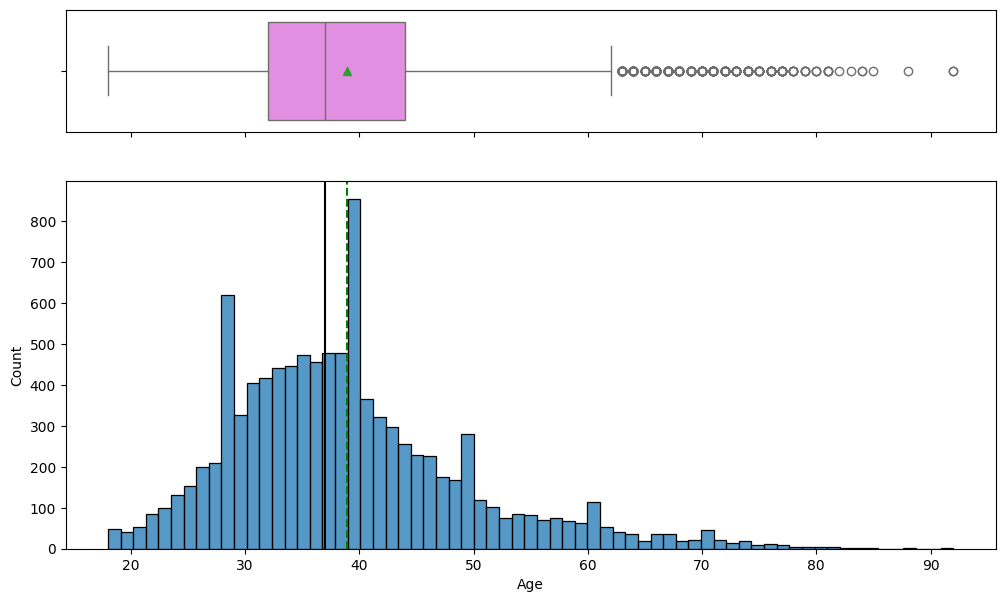

In [24]:
histogram_boxplot(df, 'Age')

* `Age` has a good amount of outliers on the higher age range
* The distribution seems to be skewed right
* The largest amount of customers are just under 40 years of age with a little over 800 customers

 #### `Balance`

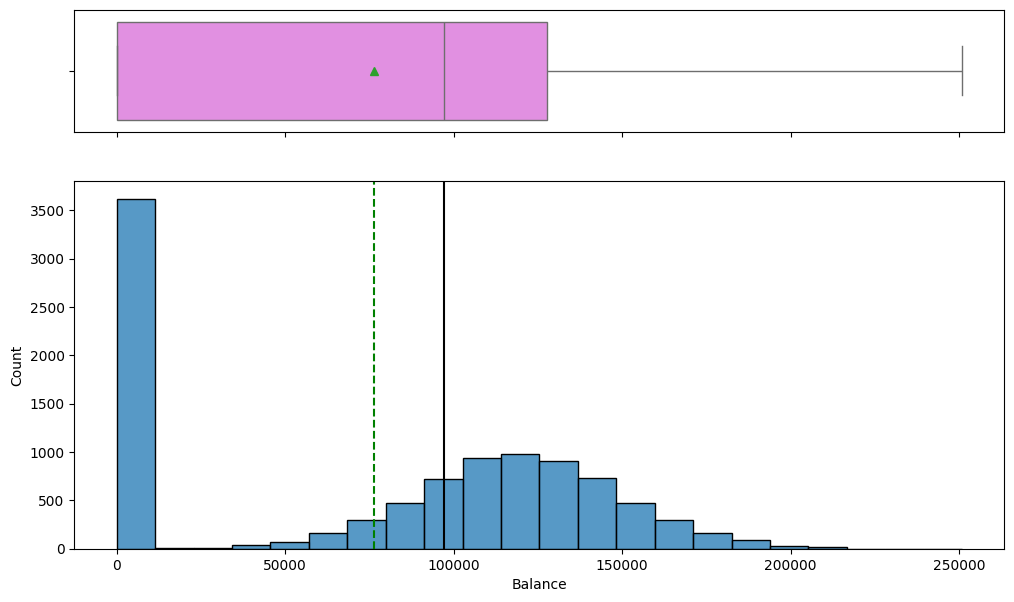

In [25]:
histogram_boxplot(df, 'Balance')

In [26]:
df.Balance.value_counts()

,count
Balance,
0.00,3617
130170.82,2
105473.74,2
85304.27,1
159397.75,1
...,...
81556.89,1
112687.69,1
108698.96,1


* Over 3600 customers have a 0 `Balance`
* With the 0 `Balance` customers, the distribution is skewed right, but it looks like without the 0 `Balance` customers, it looks like it is normally distributed.

 #### `Estimated Salary`

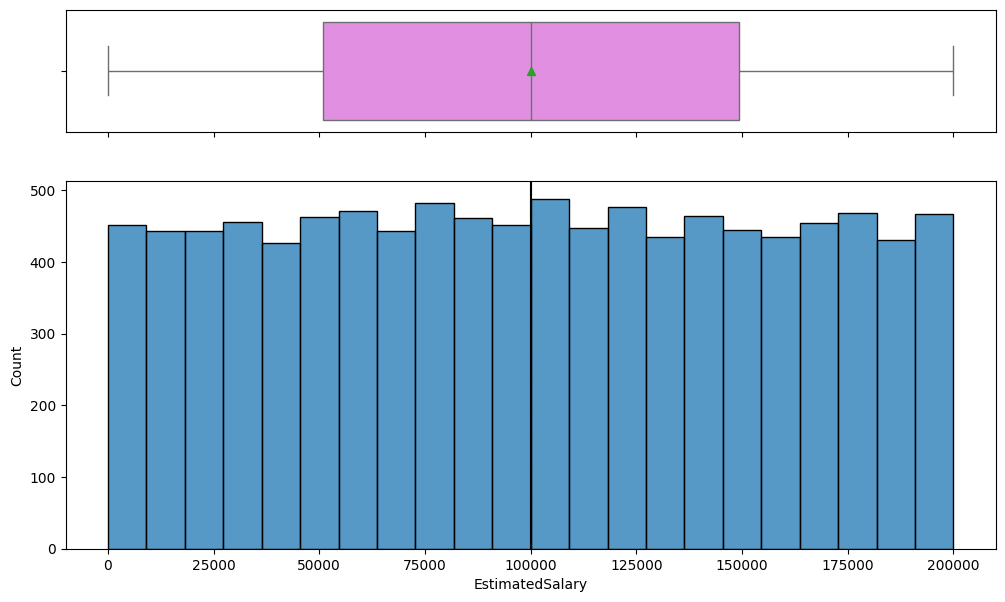

In [27]:
histogram_boxplot(df, 'EstimatedSalary')

* `Estimated Salary` looks to be a uniform distribution.

 #### `Exited`

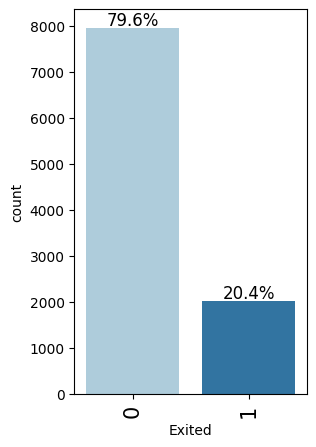

In [28]:
labeled_barplot(df, 'Exited', perc=True)

* `Exited` shows that 20.4% of the 10,000 customers have left the bank in the last 6 months
* `Exited` is the target variable.
* 0 - customers still with bank
* 1 - customers who have exited the bank

 #### `Geography`

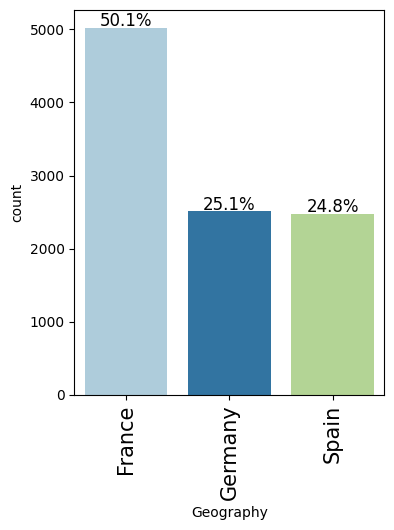

In [29]:
labeled_barplot(df, 'Geography', perc=True)

* `Geography` indicates that customers come from 3 different countries( France, Germany and Spain)
* 50% of customers are from France while 25% come from German and 25% from Spain.

 #### `Gender`

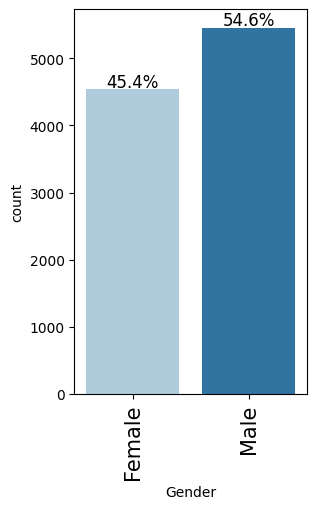

In [30]:
labeled_barplot(df, 'Gender', perc=True)

* Customers are relatively split across customers with Males making up 54.6% of the customer base

 #### `Tenure`

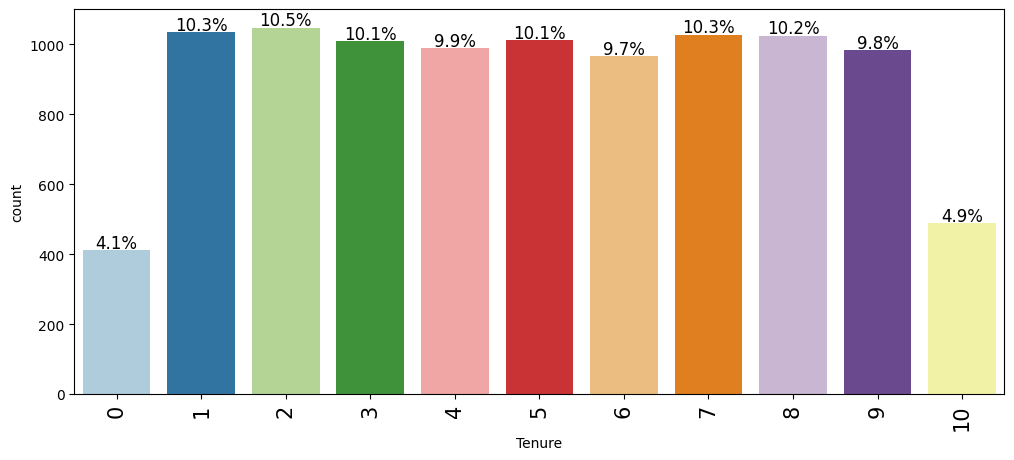

In [31]:
labeled_barplot(df, 'Tenure', perc=True)

* `Tenure` across the customers tend to be on average 10% for each year from 1-9 years of tenure across the bank.
* 4.1% of customers have only been with the bank for less than a year and only 4.9% of customers have been with the bank for 10 years.

 #### `Number Of Products`

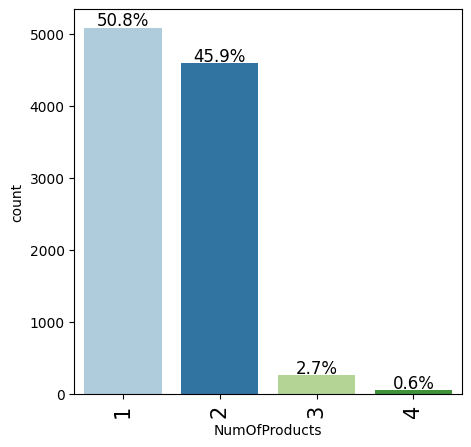

In [32]:
labeled_barplot(df, 'NumOfProducts', perc=True)

* 50.8% of customers have 1 product with the bank
* 45.9% of customers have 2 products with the bank
* A very small 3% of customers have either 3 or 4 products with the bank

 #### `Has Credit Card`

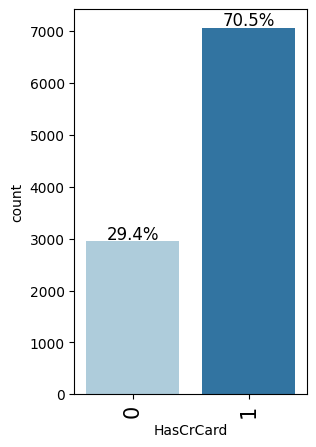

In [33]:
labeled_barplot(df, 'HasCrCard', perc=True)

* 70.5 of Customers have a Credit Card.

 #### `Is Active Member`

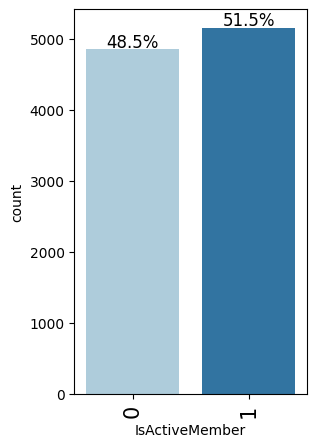

In [34]:
labeled_barplot(df, 'IsActiveMember', perc=True)

* There seems to be about a 50/50 split on customers who are actively interacting with the bank.
* There is slightly more active customers (51.5%) than inactive customers

### Bivariate Analysis

In [35]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [36]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

 #### `Correlation Plot`

In [37]:
df.Gender

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female
...,...
9995,Male
9996,Male
9997,Female
9998,Male


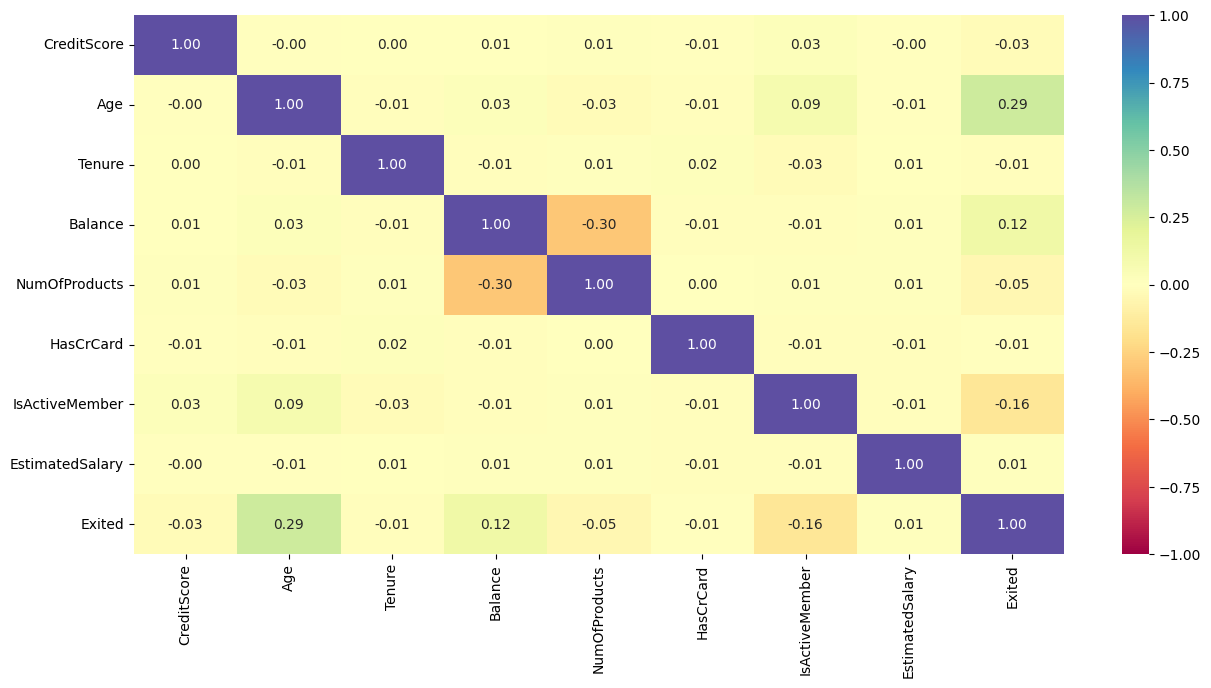

In [38]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There seems to be no large correlations between any of the numerical variables. The small correlations is as follows:
* There is a slight positive correlation between `Age` and `Exited`(0.29)
* There is a slight negative correlation between `Balance` and `NumOfProducts` (-0.30)
* There is even a smaller negative correlation between `Exited` and `IsActiveMember` (-0.16)

 #### `Exited VS Geography`

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


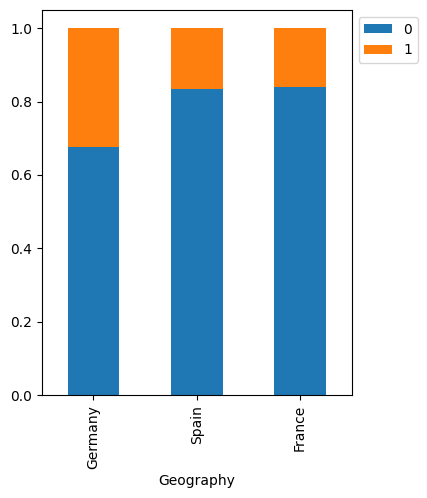

In [39]:
stacked_barplot(df, 'Geography', 'Exited')

* Germany and France have had similar amounts of Customers who have exited (1) the bank, but France contains nearly 50% of the customer population
* Germany and Spain have relatively equal customer bases, but Spain is able to keep more of their customers
* Spain and France have had about 17% of their customers who have Exited.
* Germany has had 32%  of their customers base who have Exited

 #### `Exited VS Gender`

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


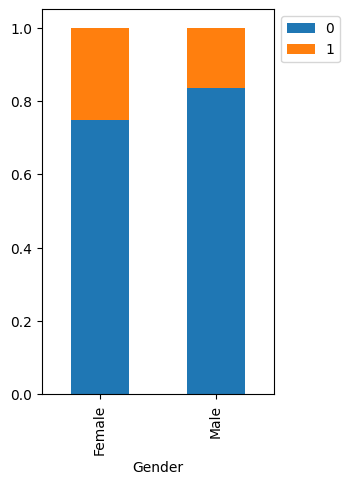

In [40]:
stacked_barplot(df, 'Gender', 'Exited')

* 25% of the Female Customers have Exited
* 16% of Male Customers have Exited
* Male customers seem to be the most happy with the bank

 #### `Exited VS Has Credit Card`

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


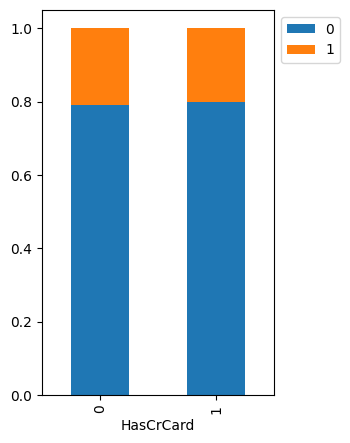

In [41]:
stacked_barplot(df, 'HasCrCard', 'Exited')

* There seems to be no relationship between Having a Credit Card and Exiting the Bank.

 #### `Exited VS Is Active Member`

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


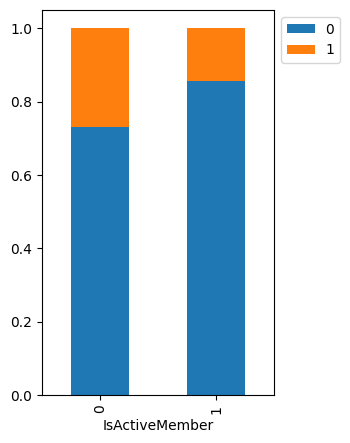

In [42]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

* 26% of customers who are inactive have exited the bank
* 14% of customers who are active have exited the bank
* If a customer is inactive, then they are more likely to have `Exited` the bank

 #### `Exited VS Credit Score`

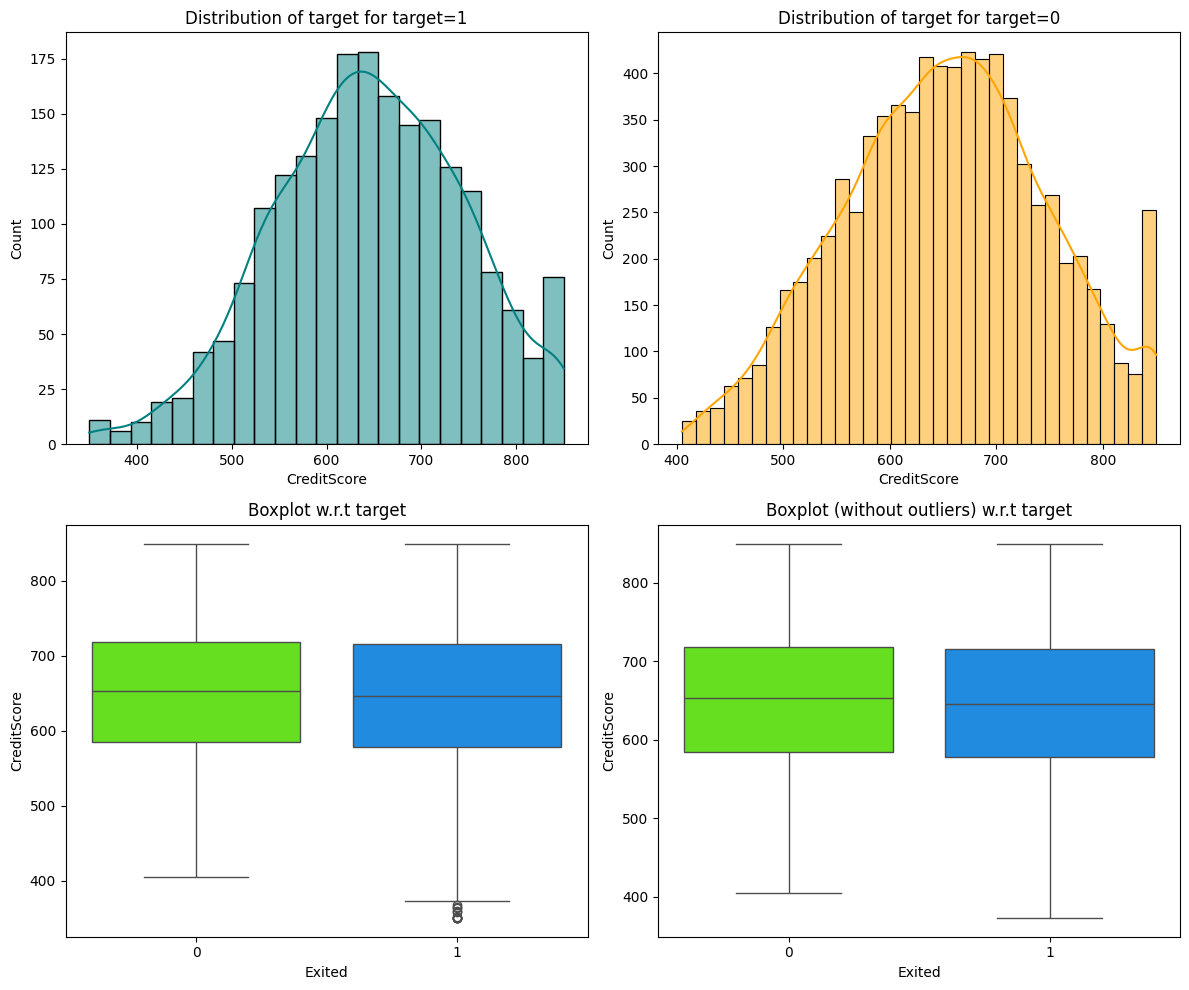

In [43]:
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

* Customers who have Exited the bank have a slightly lower average `CreditScore`.
* For customers who have Exited the bank (1), there seems to be outliers on the lower end of the credit score. Their lower creditscore range is also lower than 400 which seems to be the minimum for customers who have stayed with the bank.  This could indicate that customers were struggling to pay their bills and might have been forced to close their accounts.


 #### `Exited VS Age`

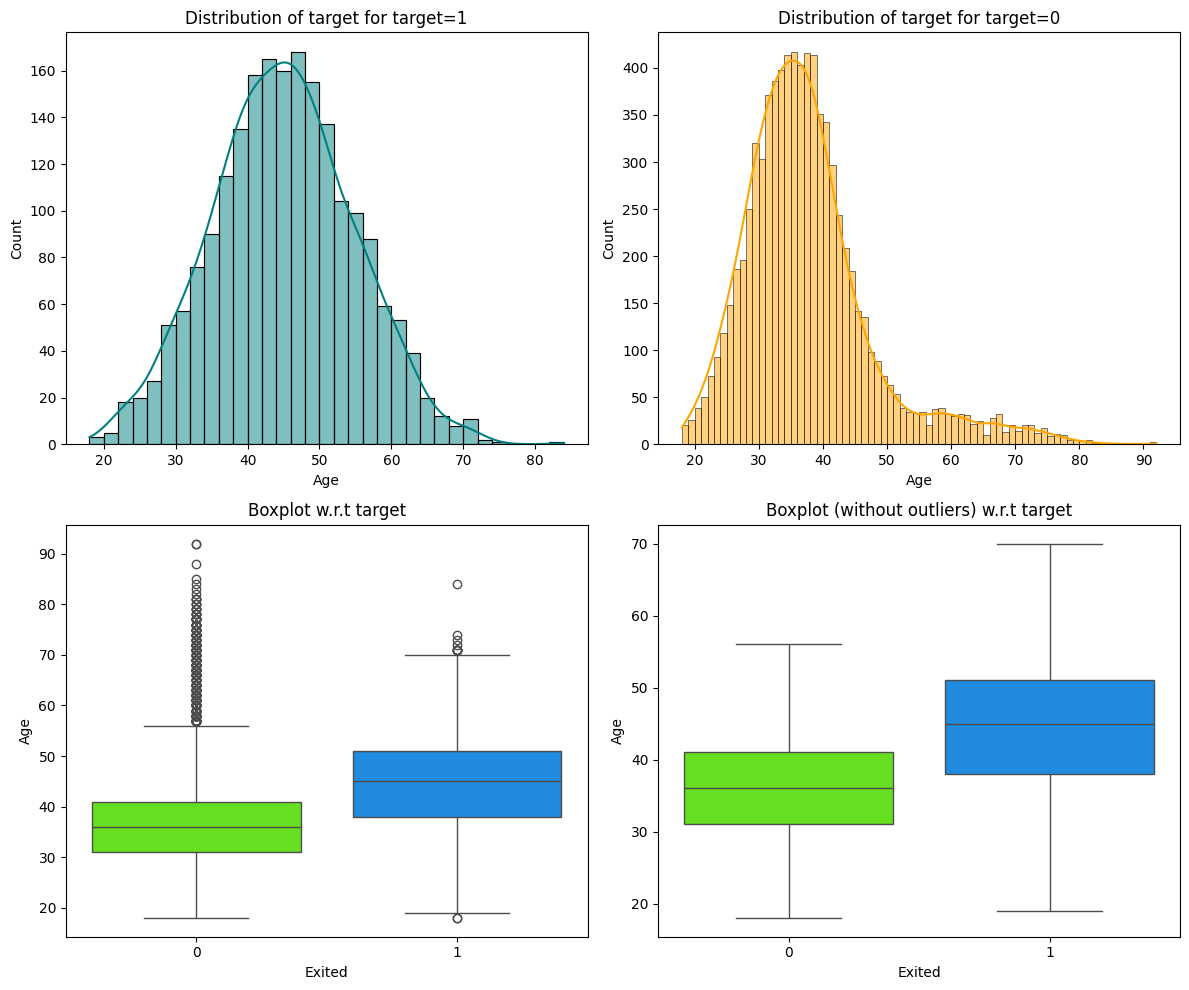

In [44]:
distribution_plot_wrt_target(df, 'Age', 'Exited')

* The average age of customers who have Exited seems to be higher than customers who have stayed with the bank.
* Average age of exited customers is around 45 while customers who have stayed with the bank are around 35.
* Customers who have stayed with the bank shows a right skewed distribution with age reaching into the 90s.
* Customers who have exited the bank seems to be relatively normally distributed with a lower max age in the 80s.
* This could indicate that customers might not want to bother with changing banks at that point in life.

 #### `Exited VS Tenure`

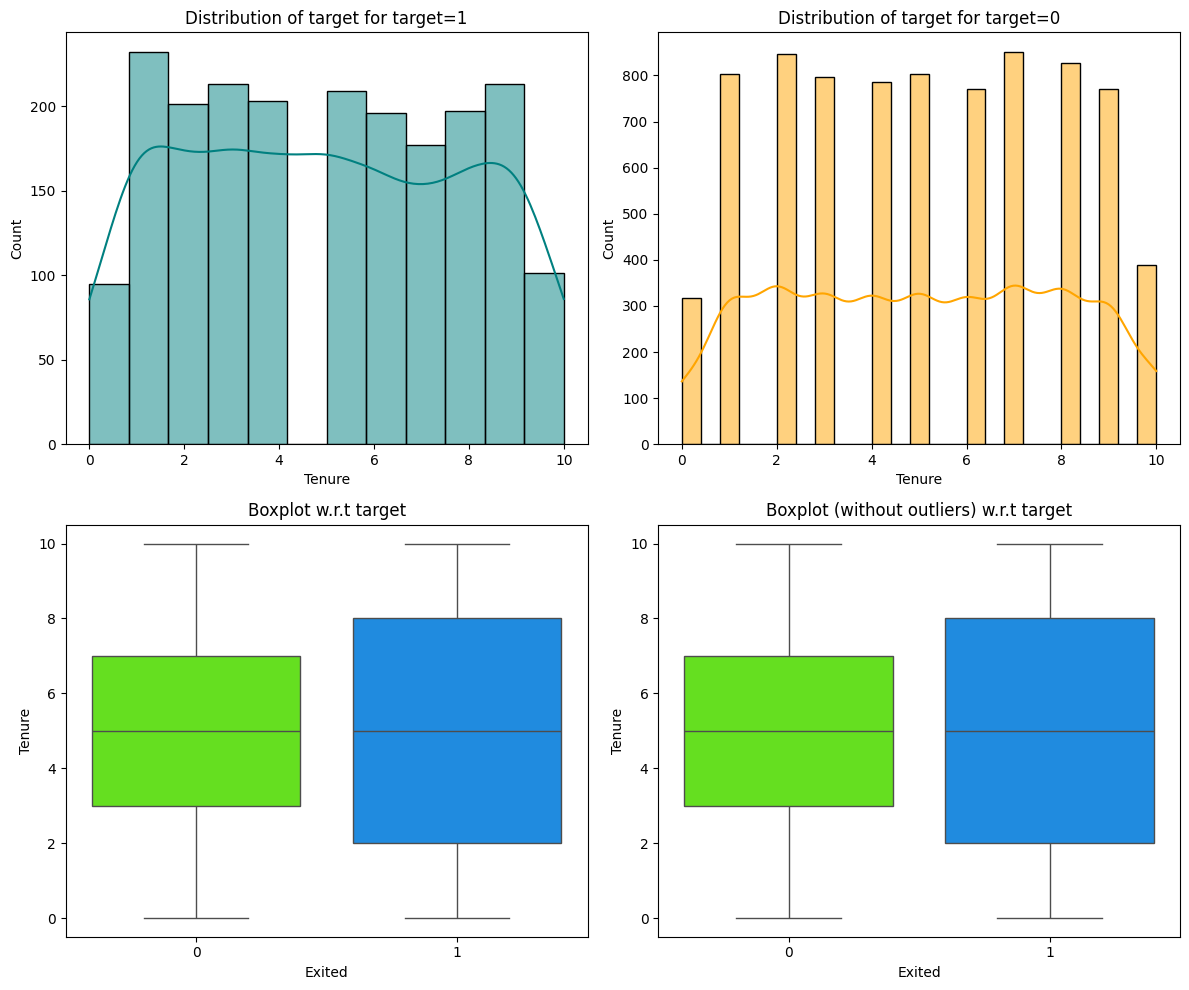

In [45]:
distribution_plot_wrt_target(df, 'Tenure', 'Exited')

* `Tenure` for Exited = 0 and Exited = 1 both seem to average about 5 years and both have minimum of 0 years and a maximum of 10 years.

 #### `Exited VS Balance`

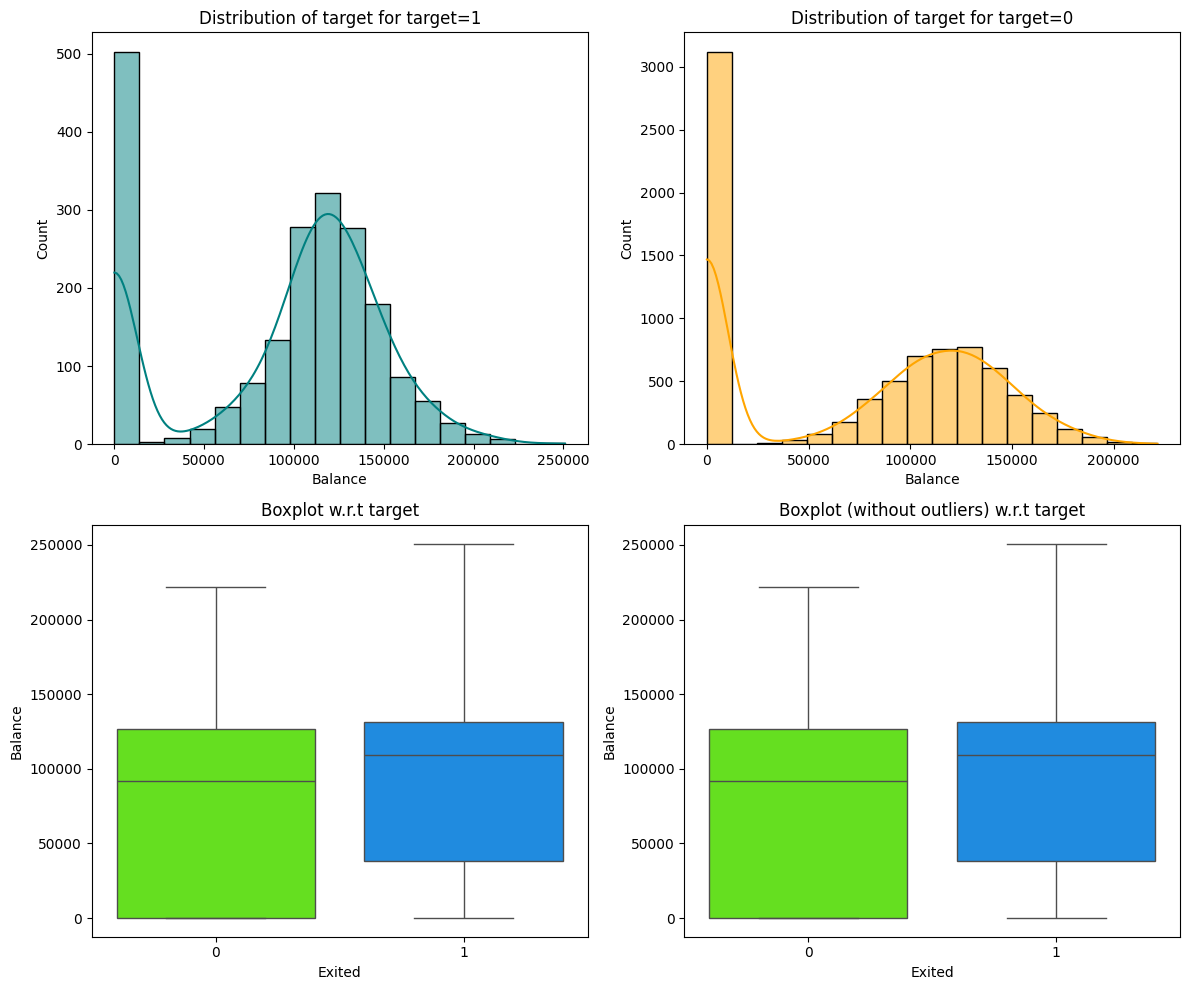

In [46]:
distribution_plot_wrt_target(df, 'Balance', 'Exited')

* `Exited` = 0 and `Exited` = 1 contain customers who have no account balance.  This might indicate, that this is not the customers' primary bank accounts
* The account balance for customers who have exited the bank are on average higher than the customers who have stayed with the bank.
* This might indicate the customers who have Exited might have left for better opportunities.

 #### `Exited VS Number of Products`

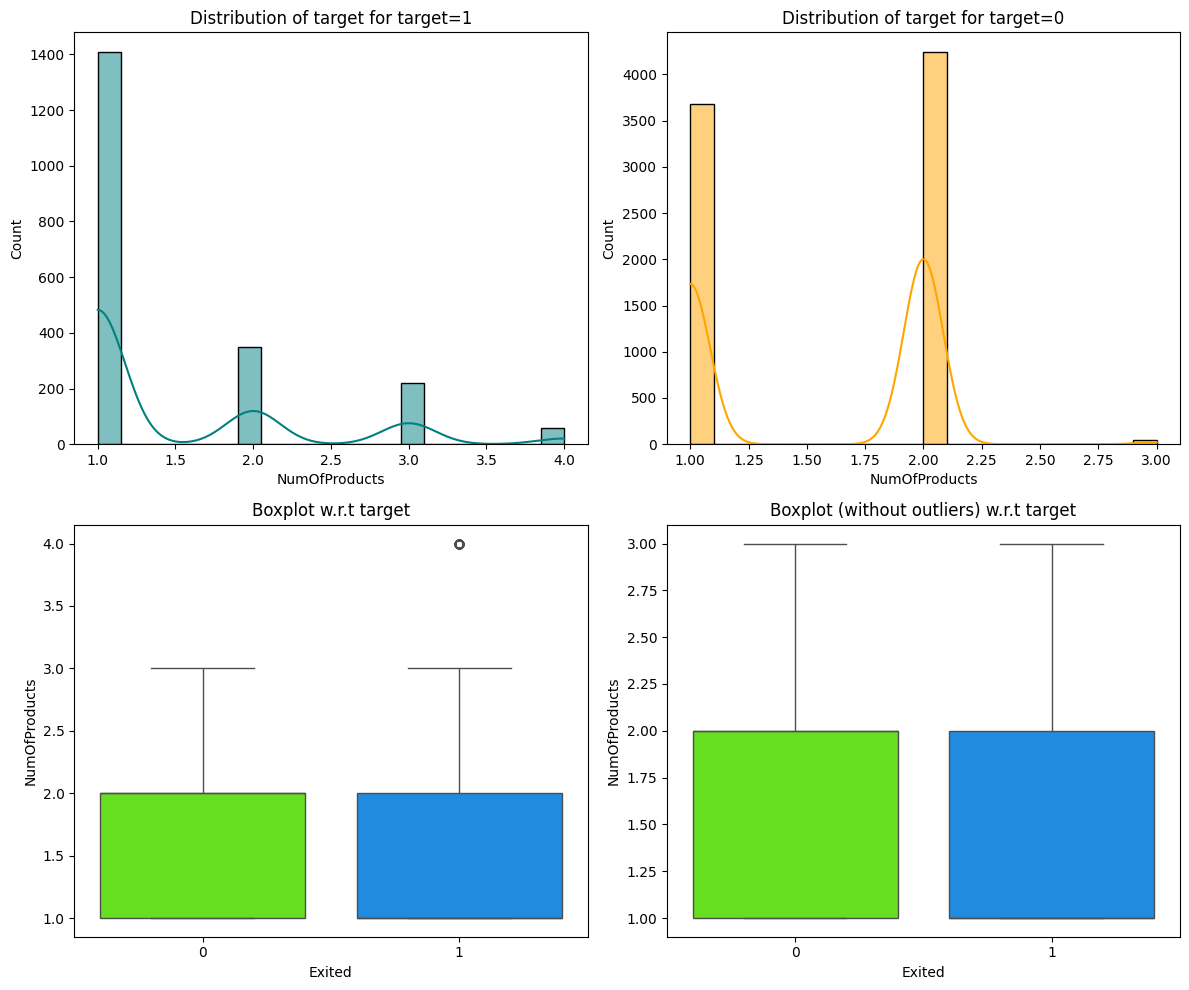

In [47]:
distribution_plot_wrt_target(df, 'NumOfProducts','Exited' )

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


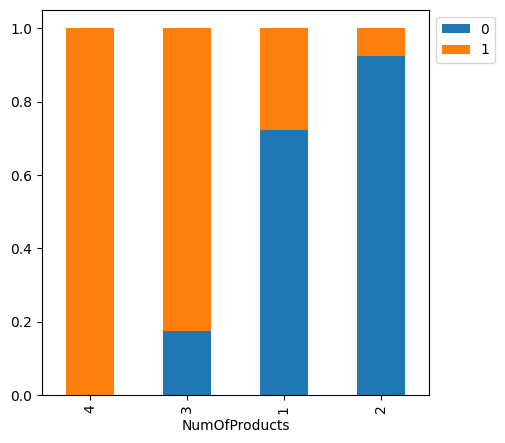

In [48]:
stacked_barplot(df, 'NumOfProducts', 'Exited')

* Customers who have `Exited` the bank seem  to have 1-4 products while customers who have remained with the bank have 1-3 products
* The majority of customers who have stayed with the bank have 2 products
* It seems that of all the customers who have purchased 4 products, all of them have left the bank and that the majority of customers with 3 products have left the bank as well.

 #### `Exited VS Estimated Salary`

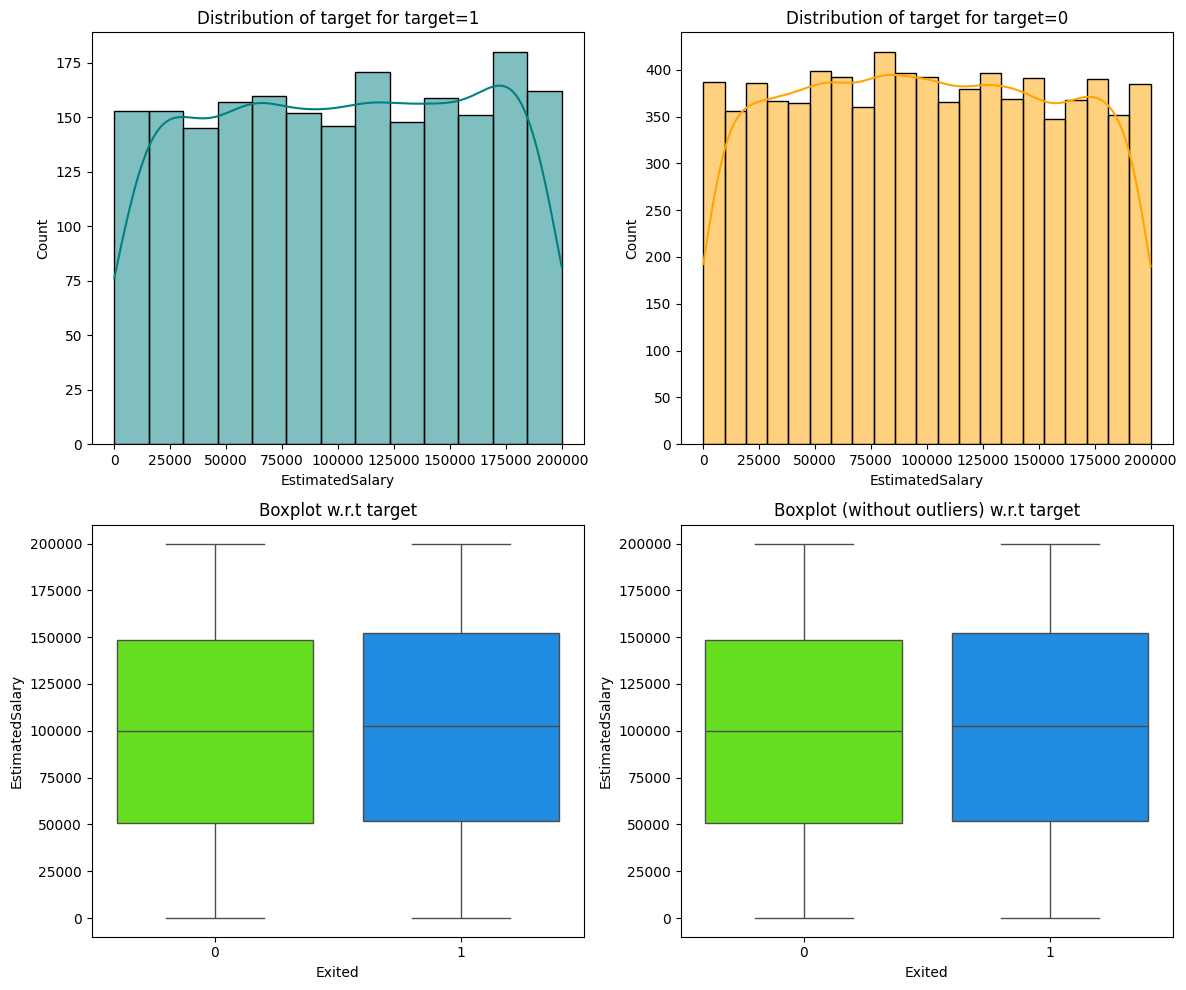

In [49]:
distribution_plot_wrt_target(df, 'EstimatedSalary', 'Exited')

* `EstimatedSalary` across the customers who have either `Exited` the bank or stayed with the bank seem to be relatively uniformaly distributed with a minimum of 0 and a maximum of 200,000

## Data Preprocessing

### Outlier Detection

In [50]:
# select numeric columns
numeric_columns = df.select_dtypes(include=['number'])


In [51]:
# Code to be used checking for outliers.
Q1 = numeric_columns.quantile(0.25)  # The 25th percentile.
Q3 = numeric_columns.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [52]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

,0
CreditScore,0.15
Age,3.59
Tenure,0.00
Balance,0.00
NumOfProducts,0.60
HasCrCard,0.00
IsActiveMember,0.00
EstimatedSalary,0.00
Exited,20.37


* There is no outliers that are considered a mistake. All values are determined as significant for analysis.

### Train-validation-test Split

In [53]:
# defining the dependent and independent variables
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [54]:
# Splitting the data in 80:20 ratio for train and temp data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Splitting temp data into Training and Validation Set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

In [56]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (6000, 10)
Shape of Validation Set (2000, 10)
Shape of Test Set :  (2000, 10)
****************************************
Percentage of classes in training set:
Exited
0   0.80
1   0.20
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Exited
0   0.80
1   0.20
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Exited
0   0.80
1   0.20
Name: proportion, dtype: float64
****************************************


In [57]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


In [58]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Dummy Variable Creation

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
dtypes: category(2), float64(2), int64(6)
memory usage: 644.9 KB


In [60]:
# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [61]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (6000, 11)
Shape of X_val: (2000, 11)
Shape of X_test: (2000, 11)


In [62]:
# Printing shape of new data frames.
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1995 to 1215
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6000 non-null   int64  
 1   Age                6000 non-null   int64  
 2   Tenure             6000 non-null   int64  
 3   Balance            6000 non-null   float64
 4   NumOfProducts      6000 non-null   int64  
 5   HasCrCard          6000 non-null   int64  
 6   IsActiveMember     6000 non-null   int64  
 7   EstimatedSalary    6000 non-null   float64
 8   Geography_Germany  6000 non-null   bool   
 9   Geography_Spain    6000 non-null   bool   
 10  Gender_Male        6000 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 439.5 KB


### Data Normalization

In [64]:
# Numerical Columns to Scale
num_columns =['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X_train[num_columns])

StandardScaler()

In [65]:
# Transform selected columns in X_train, X_val and X_test using Scaler
X_train[num_columns] = scaler.transform(X_train[num_columns])
X_val[num_columns] = scaler.transform(X_val[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [66]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1995,-0.69,0.48,-0.01,0.30,0.80,1,1,0.12,False,False,False
2724,-2.05,-0.09,1.02,0.70,-0.91,1,0,0.53,True,False,False
5224,1.57,0.39,-0.70,-1.24,-0.91,1,0,-0.48,False,True,True
7697,-0.52,0.19,-0.70,-1.24,0.80,1,0,-0.79,False,True,False
1226,-1.24,0.29,0.33,0.18,0.80,1,0,-0.42,True,False,False


## Model Building

### Model Evaluation Criterion

Model can make wrong predictions as:

* Predicting a customer is exiting and the customer is not exiting(False Positive - FP)
* Predicting a customer is not exiting and customer is exiting (False Negative - FN)

What is worse:

* False Negatives (FN) are worse - predicting that customer is not exiting but they are exiting.

Why:
* The loss of customers means a loss to the bank. False Negatives means the bank will have misidentified the customer and wouldn't have provided intitiative for the customer to stay.

How to Reduce:
* Recall means casting a wider net. It is the ability to find all relevant customers within a data set. A wider net minimizes FNs.THe focus will be on Recall. In other words, Recall helps to identify the actual positives correctly identified. The True Positives (`Exited`= 1)

### Utility functions

In [67]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [68]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_Recall","Valid_Recall"]
results = pd.DataFrame(columns=columns)

In [69]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

We'll use **Recall** as our metric of choice for the model to optimize

In [70]:
metrics = [keras.metrics.Recall(name="recall")]

### Neural Network with SGD Optimizer

#### Model 0

In [71]:
# setting seeds for all models - ensures consistat outputs
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [72]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
tf.keras.backend.clear_session()

In [73]:
# Creating a sequential model.
model_0 = Sequential()
# Adding the hidden and output layers.

# Input layer with 64 neurons and relu activation fuction
model_0.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))

# Hidden Layer with 32 neurons and relu activation
model_0.add(Dense(32, activation="relu"))

# Output Layer with 1 neuron and sigmoid activation(useful for binary classification)
model_0.add(Dense(1, activation= 'sigmoid'))

In [74]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Add SGD as optimizer
optimizer = keras.optimizers.SGD()
model_0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [76]:
# Define Inital Epochs and Batch_size
epochs= 50
batch_size = 32

In [77]:
import time
start = time.time()
history = model_0.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end = time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - loss: 0.5807 - recall: 0.0814 - val_loss: 0.4860 - val_recall: 0.0000e+00
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.4623 - recall: 0.0000e+00 - val_loss: 0.4603 - val_recall: 0.0000e+00
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.4383 - recall: 0.0024 - val_loss: 0.4445 - val_recall: 0.0147
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.4234 - recall: 0.0252 - val_loss: 0.4341 - val_recall: 0.0786
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.4132 - recall: 0.0765 - val_loss: 0.4266 - val_recall: 0.1278
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4053 - recall: 0.1271 - val_loss: 0.4206 - val_recall: 0.1843
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.3987 - recall: 0.1738 - val_loss: 0.4154 - val_recall: 0.2113
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - loss: 0.3927 - recall: 0.2100 - val_loss: 0.4105 - 

In [78]:
print("Time taken in seconds ",end-start)

Time taken in seconds  614.6959409713745


**Loss function**

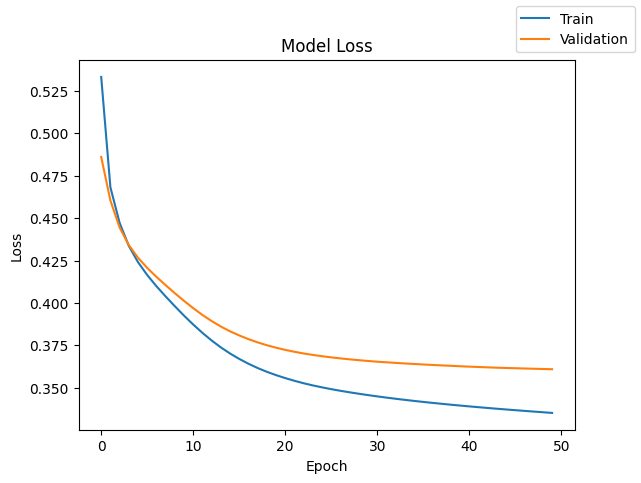

In [79]:
plot(history, 'loss')

**Recall**

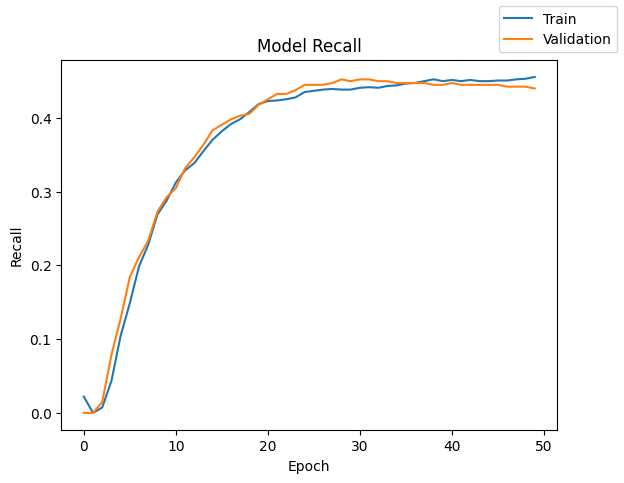

In [80]:
plot(history, 'recall')

In [81]:
results.loc[0]=[1,32,'relu',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [82]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44


#### Model 1

* Recall is under 0.5 with a loss of around 0.36.
* Let's see if increasing batch size will help

In [83]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [84]:
#Initializing the neural network
# Creating a sequential model.
model_1 = Sequential()
# Adding the hidden and output layers.

# Input layer with 64 neurons and relu activation fuction
model_1.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))

# Hidden Layer with 32 neurons and relu activation
model_1.add(Dense(32, activation="relu"))

# Output Layer with 1 neuron and sigmoid activation(useful for binary classification)
model_1.add(Dense(1, activation= 'sigmoid'))

In [85]:
# Add SGD as optimizer
optimizer = keras.optimizers.SGD()
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics,run_eagerly=True)


In [86]:
epochs= 50
batch_size = 64

In [87]:
start = time.time()
history = model_1.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end = time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.6848 - recall: 0.3857 - val_loss: 0.5424 - val_recall: 0.0000e+00
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.5169 - recall: 8.5913e-04 - val_loss: 0.4922 - val_recall: 0.0000e+00
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.4743 - recall: 8.5913e-04 - val_loss: 0.4740 - val_recall: 0.0000e+00
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.4565 - recall: 0.0010 - val_loss: 0.4630 - val_recall: 0.0000e+00
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.4453 - recall: 0.0022 - val_loss: 0.4547 - val_recall: 0.0074
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.4369 - recall: 0.0060 - val_loss: 0.4483 - val_recall: 0.0172
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.4302 - recall: 0.0138 - val_loss: 0.4431 - val_recall: 0.0369
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.4247 - recall: 0.0288 - val_loss: 0.4388 - val_reca

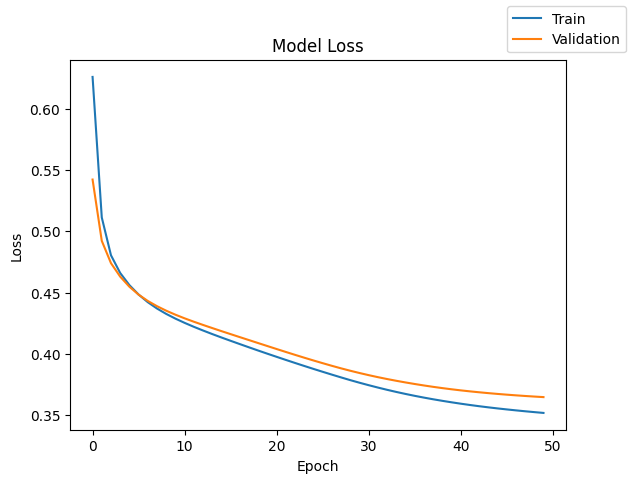

In [88]:
plot(history,'loss')

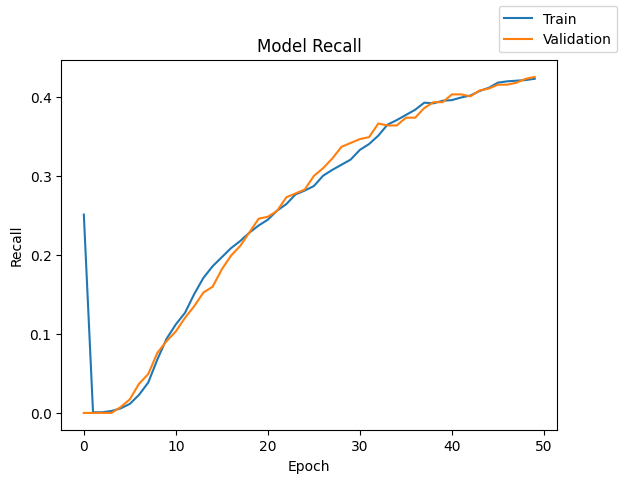

In [89]:
plot(history, 'recall')

In [90]:
results.loc[1]=[1,32,'relu',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [91]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43


* Increasing Batch size resulted in higher loss and lower recall. Will stick with Batch Size = 32 going forward

In [92]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [93]:
# Predicting y using default threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [94]:
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred> 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [95]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Confusion Matrix**

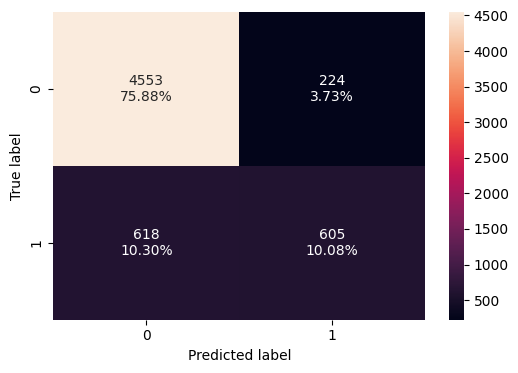

In [96]:
make_confusion_matrix(y_train, y_train_pred)


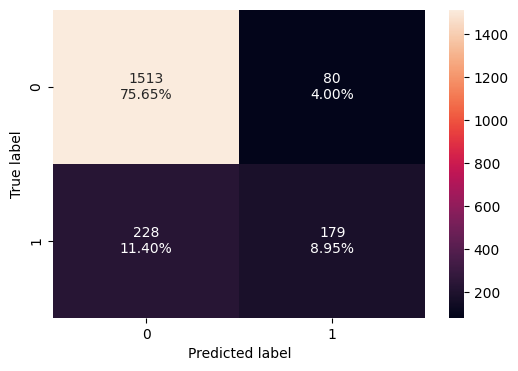

In [97]:
make_confusion_matrix(y_val, y_val_pred)

**Classification report**

In [98]:
# classification resport
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4777
           1       0.73      0.49      0.59      1223

    accuracy                           0.86      6000
   macro avg       0.81      0.72      0.75      6000
weighted avg       0.85      0.86      0.85      6000



In [99]:
# classification resport
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.44      0.54       407

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [100]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43


* Model 0 has the best results for NN with SGD. It has the best results for Recall with a lower loss. The time it took double of Model 1.
* 11.4% of customers exiting without the bank attempting to intervene.
* Model 0 has a 0.44 Recall.

## Model Performance Improvement

### Neural Network with Adam Optimizer

#### Model 2

In [101]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
tf.keras.backend.clear_session()

In [102]:
# Creating a sequential model.
model_adam = Sequential()
# Adding the hidden and output layers.

# Input layer with 64 neurons and relu activation fuction
model_adam.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))

# Hidden Layer with 32 neurons and relu activation
model_adam.add(Dense(32, activation="relu"))

# Output Layer with 1 neuron and sigmoid activation(useful for binary classification)
model_adam.add(Dense(1, activation= 'sigmoid'))

In [103]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer1 = tf.keras.optimizers.Adam(0.001)
model_adam.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=['recall'])

In [104]:
model_adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# increasing batch size without being the whole data set seems to have reduced loss
# sticking with epochs number as a starting point
epochs= 50
batch_size = 64

In [106]:
start = time.time()
history = model_adam.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end = time.time()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.6174 - recall: 0.2233 - val_loss: 0.4460 - val_recall: 0.0246
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4183 - recall: 0.0761 - val_loss: 0.4120 - val_recall: 0.2457
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3846 - recall: 0.2635 - val_loss: 0.3860 - val_recall: 0.3735
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3610 - recall: 0.3756 - val_loss: 0.3722 - val_recall: 0.4324
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3482 - recall: 0.4085 - val_loss: 0.3669 - val_recall: 0.4324
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3410 - recall: 0.4343 - val_loss: 0.3646 - val_recall: 0.4496
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3365 - recall: 0.4413 - val_loss: 0.3632 - val_recall: 0.4472
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3330 - recall: 0.4475 - val_loss: 0.3624 - val_recall: 0.4545
Epoch 9/50
94/94 ━━━━

In [107]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.03891181945801


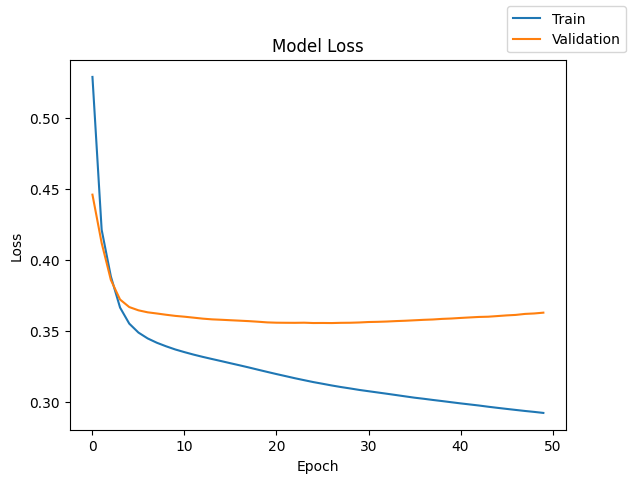

In [108]:
plot(history, 'loss')

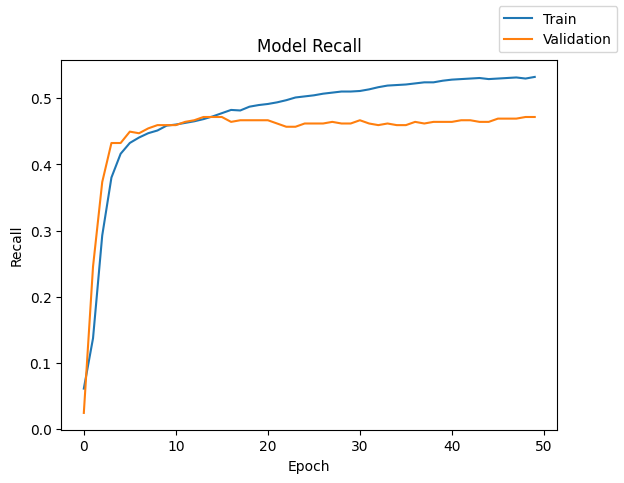

In [109]:
plot(history, 'recall')

In [110]:
results.loc[2]=[1,32,'relu',epochs,batch_size,'Adam',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [111]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47


* Recall is better than the models with sgd and loss is about equal to models 0 and 1, but there is a larger difference between Train and Validation. Lets see if changing the batch size to 32 might help.
* The adam optimizer made model training significantly faster

#### Model 3

In [112]:
# Clearing backend to help avoid clutter from old models and layers, and clear up memory.
tf.keras.backend.clear_session()



In [113]:
# Creating a sequential model.
model_adam_1 = Sequential()
# Adding the hidden and output layers.

# Input layer with 64 neurons and relu activation fuction
model_adam_1.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))

# Hidden Layer with 32 neurons and relu activation
model_adam_1.add(Dense(32, activation="relu"))

# Output Layer with 1 neuron and sigmoid activation(useful for binary classification)
model_adam_1.add(Dense(1, activation= 'sigmoid'))

In [118]:
model_adam_1.compile(loss='binary_crossentropy',optimizer=optimizer1,metrics=['recall'])
optimizer1 = tf.keras.optimizers.Adam(0.001)

In [119]:
# increase epochs
epochs= 50
batch_size = 32

In [120]:
start = time.time()
history = model_adam_1.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end = time.time()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5170 - recall: 0.0611 - val_loss: 0.3967 - val_recall: 0.3047
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3703 - recall: 0.3185 - val_loss: 0.3691 - val_recall: 0.4152
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3472 - recall: 0.4192 - val_loss: 0.3613 - val_recall: 0.4423
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3391 - recall: 0.4455 - val_loss: 0.3577 - val_recall: 0.4496
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3341 - recall: 0.4622 - val_loss: 0.3551 - val_recall: 0.4373
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3300 - recall: 0.4635 - val_loss: 0.3533 - val_recall: 0.4373
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3267 - recall: 0.4752 - val_loss: 0.3518 - val_recall: 0.4373
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3238 - recall: 0.4814 - val_loss: 0.3505 - val_recall: 0.4373
Epoch 9/

In [121]:
print("Time taken in seconds ",end-start)

Time taken in seconds  49.24549579620361


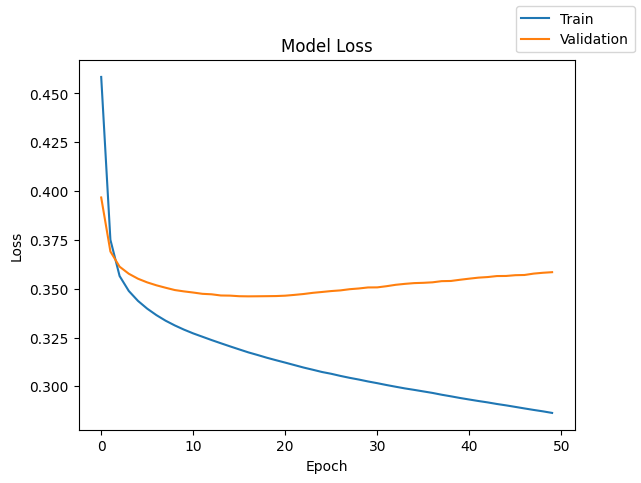

In [122]:
plot(history, 'loss')

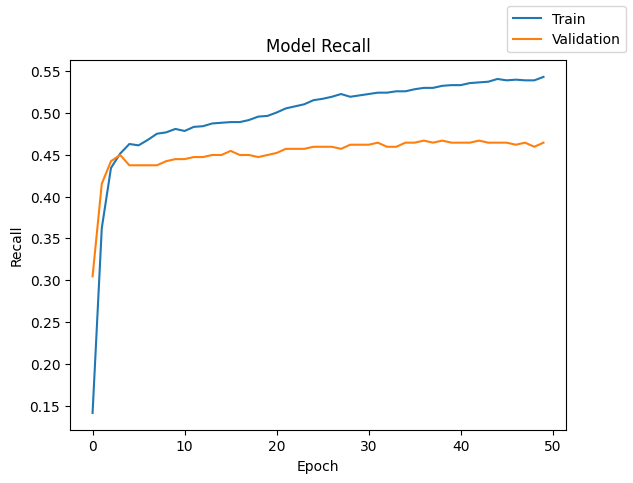

In [123]:
plot(history, 'recall')

In [124]:
results.loc[3]=[1,32,'relu',epochs,batch_size,'Adam',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [125]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46


* Decreasing the batch size resulted in very similar results. I will stick with model 2

In [126]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_adam_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [127]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_adam_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [128]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Confusion matrix**

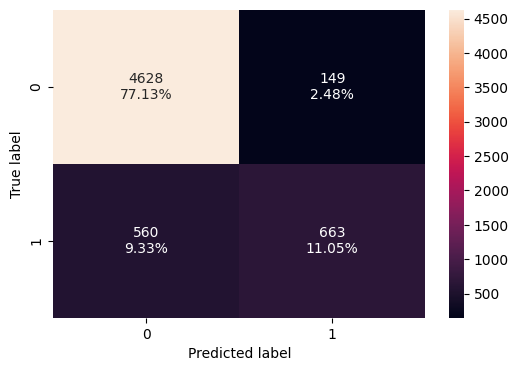

In [129]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

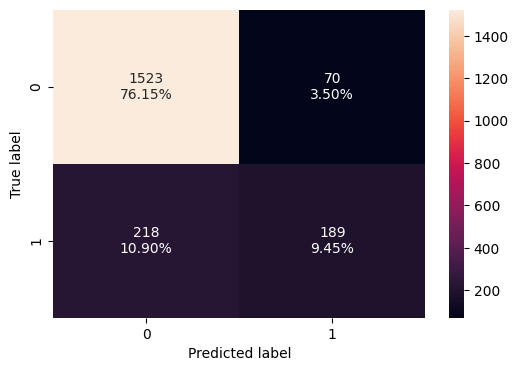

In [130]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Classification report**

In [131]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4777
           1       0.82      0.54      0.65      1223

    accuracy                           0.88      6000
   macro avg       0.85      0.76      0.79      6000
weighted avg       0.88      0.88      0.87      6000



In [132]:
# classification resport
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [133]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46


* Using Adam has improved recall.
* Recall has increased to 0.47
* The customers who are exiting without bank intervention has dropped to 10.9% from 11.4%

### Neural Network with Adam Optimizer and Dropout

#### Model 4

In [134]:
tf.keras.backend.clear_session()

In [135]:
#Initializing the neural network
model_adam_2 = Sequential()
model_adam_2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model_adam_2.add(Dropout(0.2))
model_adam_2.add(Dense(64,activation='relu'))
model_adam_2.add(Dropout(0.2))
model_adam_2.add(Dense(32,activation='relu'))
model_adam_2.add(Dense(1, activation = 'sigmoid'))

In [136]:
model_adam_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer2 = tf.keras.optimizers.Adam(0.001)
model_adam_2.compile(loss='binary_crossentropy',optimizer=optimizer2,metrics=['recall'])

In [138]:
# increase epochs
epochs= 100
batch_size = 64

In [139]:
start = time.time()
history = model_adam_2.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end = time.time()

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4929 - recall: 0.0022 - val_loss: 0.4230 - val_recall: 0.0860
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4073 - recall: 0.1106 - val_loss: 0.3871 - val_recall: 0.4300
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3743 - recall: 0.3572 - val_loss: 0.3659 - val_recall: 0.4742
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3548 - recall: 0.4209 - val_loss: 0.3610 - val_recall: 0.5111
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3485 - recall: 0.4319 - val_loss: 0.3576 - val_recall: 0.5037
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3431 - recall: 0.4418 - val_loss: 0.3559 - val_recall: 0.5086
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3351 - recall: 0.4574 - val_loss: 0.3560 - val_recall: 0.4939
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3309 - recall: 0.4682 - val_loss: 0.3549 - val_recall: 0.5061
Epoch 9/100
94/9

In [140]:
print("Time taken in seconds ",end-start)

Time taken in seconds  66.11190462112427


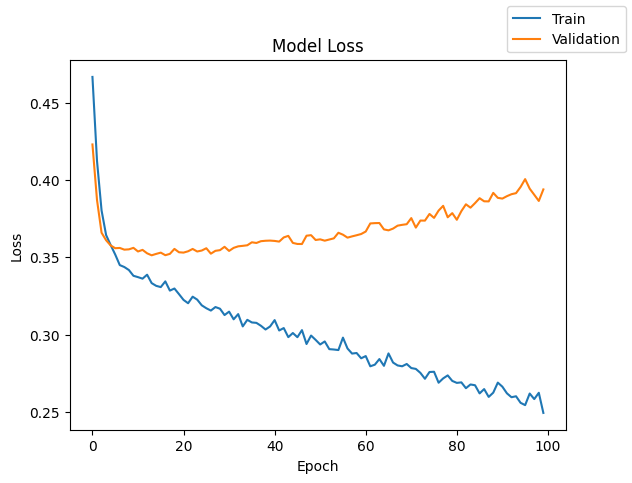

In [141]:
plot(history, 'loss')

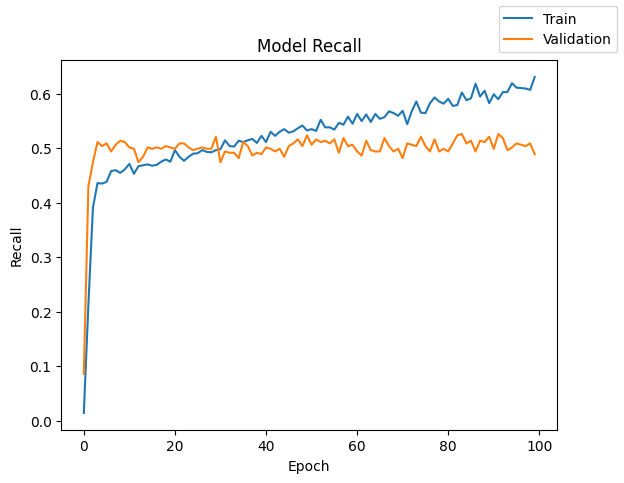

In [142]:
plot(history, 'recall')

In [143]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46


In [144]:
results.loc[4]=[2,[64,32],['relu','relu'],epochs,batch_size,'Adam with Dropout',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [145]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49


* Model 4 that is trained with Adam and dropout has a higher train and validation Recall, but it does so with an large increase in loss.  It isn't able to generalize very well.

In [146]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_adam_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [147]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_adam_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [148]:
model_name = "NN with Adam + Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Confusion matrix**

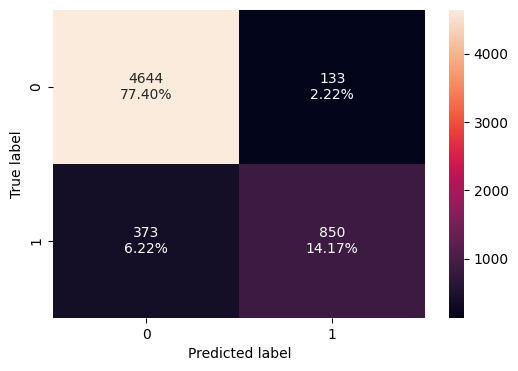

In [149]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

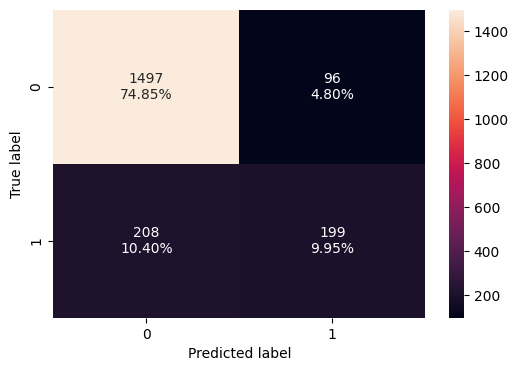

In [150]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Classification report**

In [151]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4777
           1       0.86      0.70      0.77      1223

    accuracy                           0.92      6000
   macro avg       0.90      0.83      0.86      6000
weighted avg       0.91      0.92      0.91      6000



In [152]:
# classification resport
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.67      0.49      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [153]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49


* Results of customers exiting without bank intervention has decreased from 10.9% to 10.4%.
* Recall has increased but so has loss.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

#### Model 5

In [154]:
# Use SMOTE to balance dataset and apply hyperparamters tuning
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('After oversampling, the shape of X_train: {}'.format(X_train.shape))
print('After oversampling, the shape of y_train: {}'.format(y_train.shape))

After oversampling, the shape of X_train: (6000, 11)
After oversampling, the shape of y_train: (6000,)


In [155]:
# y_train before oversampling
y_train.value_counts()

,count
Exited,
0,4777
1,1223


In [156]:
# y train after oversampling
y_train_smote.value_counts()

,count
Exited,
0,4777
1,4777


In [157]:
#clear backend
tf.keras.backend.clear_session()

In [158]:
# Creating a sequential model.
model_balanced = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model_balanced.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding hidden layer with 16 neurons.
model_balanced.add(Dense(32,activation='relu'))
# Adding hidden layer with 8 neurons.
model_balanced.add(Dense(16, activation='relu'))
# Adding the output layer.
model_balanced.add(Dense(1, activation = 'relu'))

In [159]:
model_balanced.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
# Add SGD as optimizer
optimizer = keras.optimizers.SGD(0.001)
model_balanced.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['recall'],run_eagerly=True)

In [161]:
start = time.time()
history = model_balanced.fit(X_train_smote,
                    y_train_smote,
                    validation_data=(X_val, y_val),
                    batch_size=64,
                    epochs=100)
end = time.time()

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.8969 - recall: 0.4262 - val_loss: 0.7229 - val_recall: 0.6167
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.6911 - recall: 0.5547 - val_loss: 0.6992 - val_recall: 0.6560
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.6537 - recall: 0.5896 - val_loss: 0.6656 - val_recall: 0.6634
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.6284 - recall: 0.6065 - val_loss: 0.6434 - val_recall: 0.6708
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.6200 - recall: 0.5323 - val_loss: 0.6108 - val_recall: 0.6560
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.5962 - recall: 0.6479 - val_loss: 0.6092 - val_recall: 0.7052
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.5832 - recall: 0.6764 - val_loss: 0.5954 - val_recall: 0.7002
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.5693 - recall: 0.6807 - val_loss: 0.5880 - val_rec

In [162]:
print("Time taken in seconds ",end-start)

Time taken in seconds  935.8051521778107


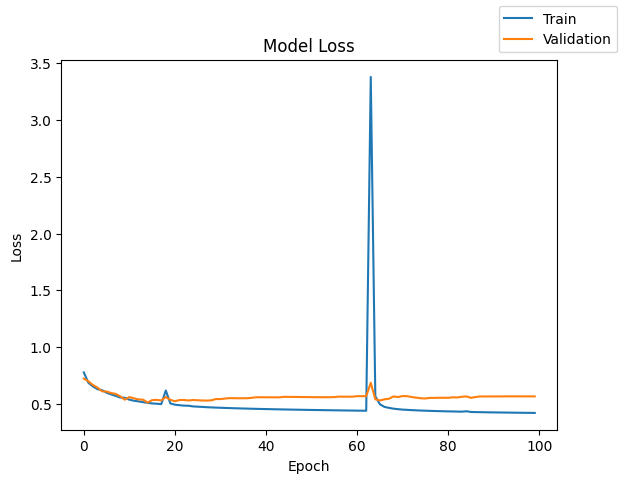

In [163]:
plot(history, 'loss')

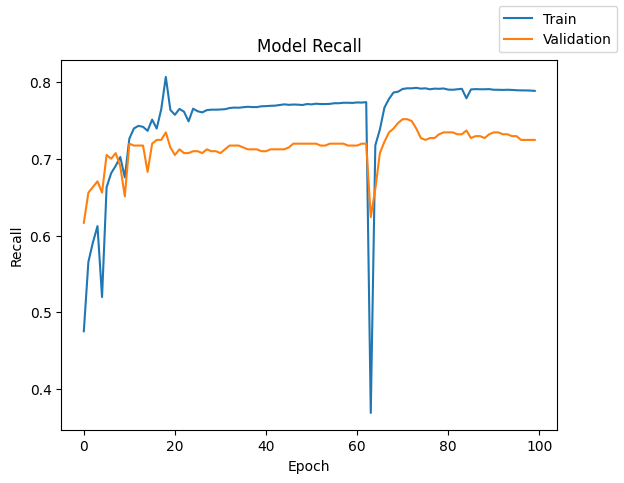

In [164]:
plot(history, 'recall')

In [165]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49


In [166]:
results.loc[5]=[2,[32,16],['relu','relu'],epochs,batch_size,'SGD w/ SMOTE',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [167]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72


 * This model is took the second longest time to train. The Recall is lower and loss is higher in this model but it seems to have generalized relatively well between Train and Validation

In [168]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_balanced.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [169]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_balanced.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [170]:
model_name = "NN with SGD + SMOTE"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Confusion matrix**

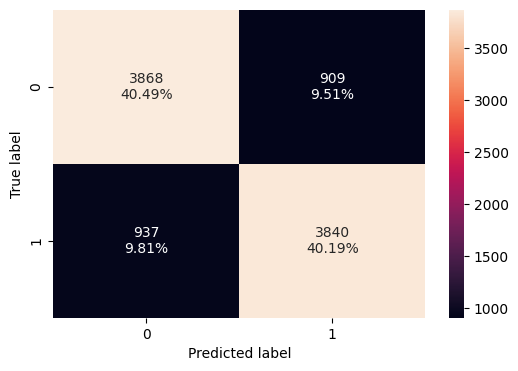

In [171]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

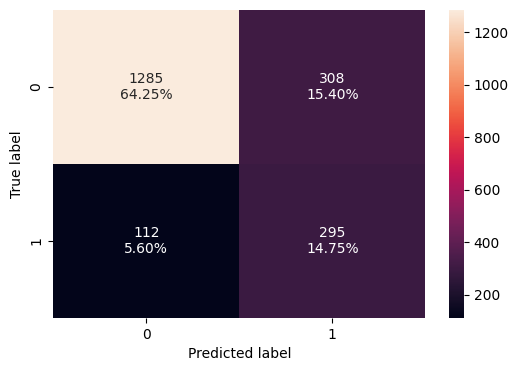

In [172]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Classification report**

In [173]:
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4777
           1       0.81      0.80      0.81      4777

    accuracy                           0.81      9554
   macro avg       0.81      0.81      0.81      9554
weighted avg       0.81      0.81      0.81      9554



In [174]:
# classification res\port
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



In [175]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72


* This model has 5.95% of customers who have exited without bank intervention.
* Recall has increased as well, but in terms of the difference between Train and Validation, they are similar.
* Model was previously trained with 32, 16, 8 and 1 Neurons respectively, but while loss was small, recall was extremely small. Let's see if I can bump up the neurons with the next model

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

#### Model 6

In [176]:
#clear backend
tf.keras.backend.clear_session()

In [177]:
# Creating a sequential model.
model_balanced_adam = Sequential()
# Adding the input layer with 32 neurons and relu as the activation function.
model_balanced_adam.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
# Adding hidden layer with 16 neurons.
model_balanced_adam.add(Dense(32,activation='relu'))
# Adding hidden layer with 8 neurons.
model_balanced_adam.add(Dense(16, activation='relu'))
# Adding the output layer.
model_balanced_adam.add(Dense(1, activation = 'relu'))

In [178]:
model_balanced_adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [179]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer2 = tf.keras.optimizers.Adam(0.001)
model_balanced_adam.compile(loss='binary_crossentropy',optimizer=optimizer2,metrics=['recall'])

In [180]:
start = time.time()
history = model_balanced_adam.fit(X_train_smote,
                    y_train_smote,
                    validation_data=(X_val, y_val),
                    batch_size=64,
                    epochs=100)
end = time.time()

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.9104 - recall: 0.1227 - val_loss: 0.7844 - val_recall: 0.6118
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6561 - recall: 0.5981 - val_loss: 0.5832 - val_recall: 0.7346
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5271 - recall: 0.7727 - val_loss: 0.5973 - val_recall: 0.7543
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4967 - recall: 0.7655 - val_loss: 0.5718 - val_recall: 0.7641
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4859 - recall: 0.7641 - val_loss: 0.5216 - val_recall: 0.7101
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4783 - recall: 0.7832 - val_loss: 0.5046 - val_recall: 0.6339
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4635 - recall: 0.7805 - val_loss: 0.5563 - val_recall: 0.7371
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4742 - recall: 0.7875 - val_loss: 0.5575 - val_recall: 0.7150


In [186]:
print("Time taken in seconds ",end-start)

Time taken in seconds  75.00115633010864


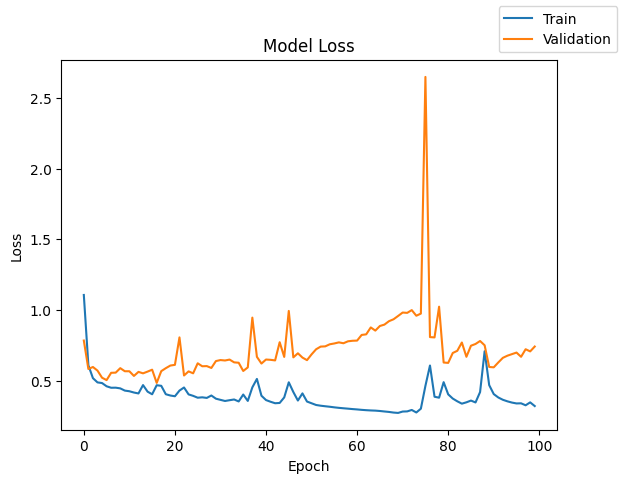

In [187]:
plot(history, 'loss')

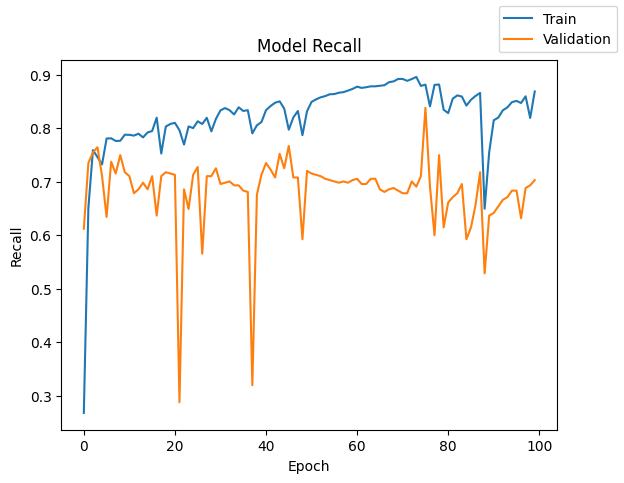

In [188]:
plot(history, 'recall')

In [189]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70


In [185]:
results.loc[6]=[2,[32,16],['relu','relu'],epochs,batch_size,'Adam w/ SMOTE',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [190]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70


 * This model was significantly faster than the SGD. It Resulted in a higher Recall in the Train and on par with the SGD w/Smote in Validation. The loss was much higher than the rest in Validation.

In [191]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_balanced_adam.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [192]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_balanced_adam.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [193]:
model_name = "NN with Adam + SMOTE"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Confusion matrix**

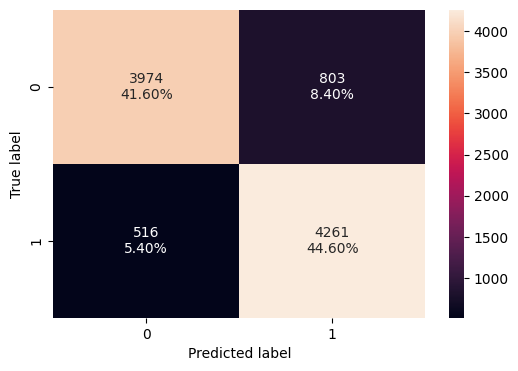

In [194]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

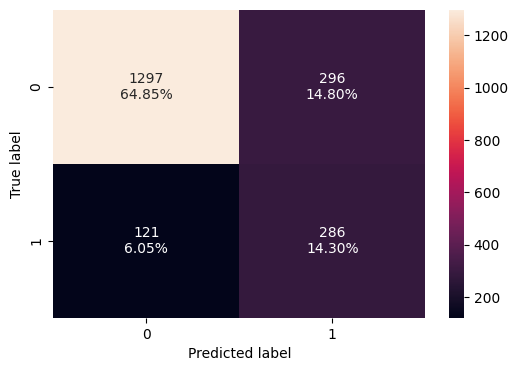

In [195]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Classification report**

In [196]:
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4777
           1       0.84      0.89      0.87      4777

    accuracy                           0.86      9554
   macro avg       0.86      0.86      0.86      9554
weighted avg       0.86      0.86      0.86      9554



In [197]:
# classification resport
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.70      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



In [198]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70


* 6.05% of customers have exited in this model without bank intervention.
* This was one of the faster models, but the loss was large while Recall was on avaerage with the other models.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

#### Model 7

In [199]:
#clear backend
tf.keras.backend.clear_session()

In [200]:
# Creating a sequential model.
model_balanced_adam_drop = Sequential()
model_balanced_adam_drop.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
model_balanced_adam_drop.add(Dropout(0.2))
model_balanced_adam_drop.add(Dense(32,activation='relu'))
model_balanced_adam_drop.add(Dropout(0.1))
model_balanced_adam_drop.add(Dense(16, activation='relu'))
model_balanced_adam_drop.add(Dense(1, activation = 'relu'))

In [201]:
model_balanced_adam_drop.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [202]:
# Compiling with Adam optimizer and binary cross entropy loss function.
optimizer2 = tf.keras.optimizers.Adam(0.001)
model_balanced_adam_drop.compile(loss='binary_crossentropy',optimizer=optimizer2,metrics=['recall'])

In [203]:
start = time.time()
history = model_balanced_adam_drop.fit(X_train_smote,
                    y_train_smote,
                    validation_data=(X_val, y_val),
                    batch_size=64,
                    epochs=100)
end = time.time()

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.6072 - recall: 0.3791 - val_loss: 0.5875 - val_recall: 0.6511
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6307 - recall: 0.6378 - val_loss: 0.5255 - val_recall: 0.6781
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5823 - recall: 0.6472 - val_loss: 0.5370 - val_recall: 0.5872
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5743 - recall: 0.6282 - val_loss: 0.4965 - val_recall: 0.6683
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5486 - recall: 0.6734 - val_loss: 0.5235 - val_recall: 0.6781
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5469 - recall: 0.6945 - val_loss: 0.4952 - val_recall: 0.6806
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5196 - recall: 0.6868 - val_loss: 0.5004 - val_recall: 0.6658
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5601 - recall: 0.6489 - val_loss: 0.4919 - val_recall: 0.6880


In [204]:
print("Time taken in seconds ",end-start)

Time taken in seconds  76.80778670310974


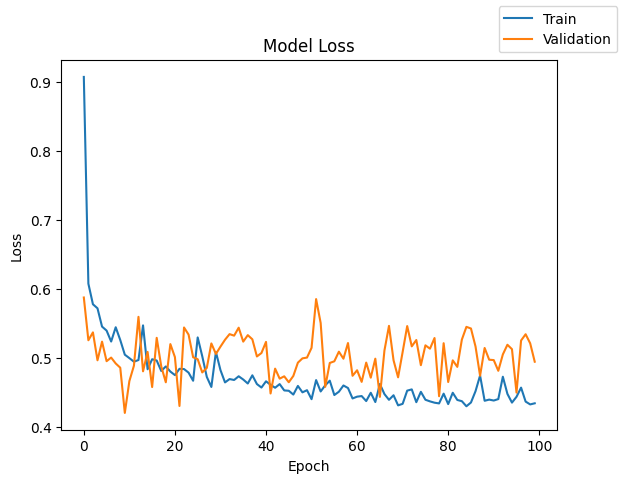

In [205]:
plot(history, 'loss')

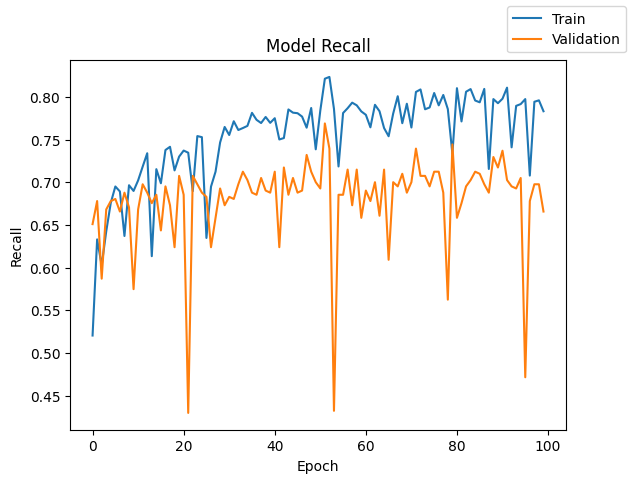

In [206]:
plot(history, 'recall')

In [207]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70


In [208]:
results.loc[7]=[2,[32,16],['relu','relu'],epochs,batch_size,'Adam w/ SMOTE & Drop',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1]]

In [209]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70
7,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE & Drop,76.81,0.43,0.49,0.78,0.67


 * This model was a little slower than Adam w/Smote.
 * It's Recall in the validation is closer with the Train than Adam w/ SMOTE.
 * The Loss between Train and Validation has also reduced.

In [210]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_balanced_adam.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [211]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_balanced_adam.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [212]:
model_name = "NN with Adam + SMOTE and Drop out"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Confusion matrix**

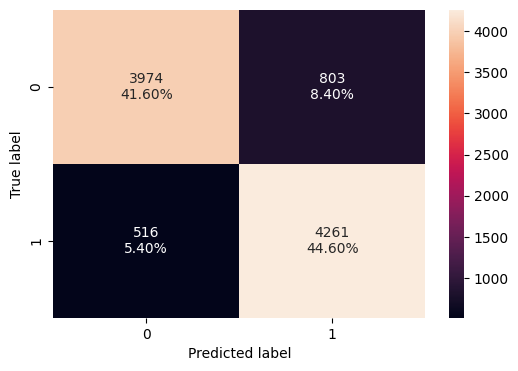

In [213]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

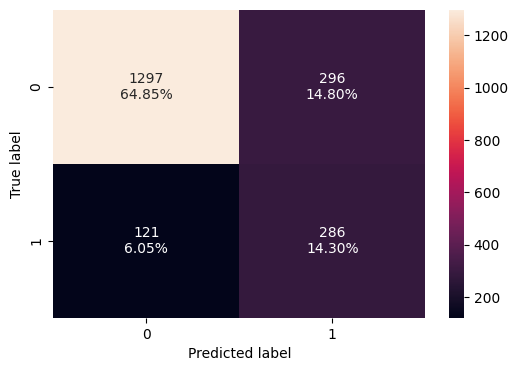

In [214]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Classification report**

In [215]:
#classification report
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4777
           1       0.84      0.89      0.87      4777

    accuracy                           0.86      9554
   macro avg       0.86      0.86      0.86      9554
weighted avg       0.86      0.86      0.86      9554



In [216]:
# classification resport
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.70      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



In [217]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70
7,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE & Drop,76.81,0.43,0.49,0.78,0.67


* This model has 6.05% of customers exiting without bank intervention.
* The Recall is less than Adam w/Smote , but the loss difference is alot less and recall is closer to each other.

## Model Performance Comparison and Final Model Selection

In [218]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.49
NN with Adam,0.54
NN with Adam + Dropout,0.70
NN with SGD + SMOTE,0.80
NN with Adam + SMOTE,0.89
NN with Adam + SMOTE and Drop out,0.89


In [220]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.44
NN with Adam,0.46
NN with Adam + Dropout,0.49
NN with SGD + SMOTE,0.72
NN with Adam + SMOTE,0.70
NN with Adam + SMOTE and Drop out,0.70


In [219]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.05
NN with Adam,0.08
NN with Adam + Dropout,0.21
NN with SGD + SMOTE,0.08
NN with Adam + SMOTE,0.19
NN with Adam + SMOTE and Drop out,0.19


In [221]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,time(secs),Train_loss,Valid_loss,Train_Recall,Valid_Recall
0,1,32,relu,50,32,SGD,614.70,0.34,0.36,0.46,0.44
1,1,32,relu,50,64,SGD,316.93,0.35,0.36,0.42,0.43
2,1,32,relu,50,64,Adam,34.04,0.29,0.36,0.53,0.47
3,1,32,relu,50,32,Adam,49.25,0.29,0.36,0.54,0.46
4,2,"[64, 32]","[relu, relu]",100,64,Adam with Dropout,66.11,0.25,0.39,0.63,0.49
5,2,"[32, 16]","[relu, relu]",100,64,SGD w/ SMOTE,935.81,0.42,0.57,0.79,0.72
6,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE,75.00,0.32,0.74,0.87,0.70
7,2,"[32, 16]","[relu, relu]",100,64,Adam w/ SMOTE & Drop,76.81,0.43,0.49,0.78,0.67


* Model 5 SGD w/ SMOTE has the highest recall
* Model 5 has the highest validation recall
* Model 5 has a loss between Train and Validation of 0.15
* Model 6 has the second highest recall but a much more significant change in loss.
* I would say Model 5 has normalized the best of all of them

In [222]:
y_test_pred = model_balanced.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [223]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



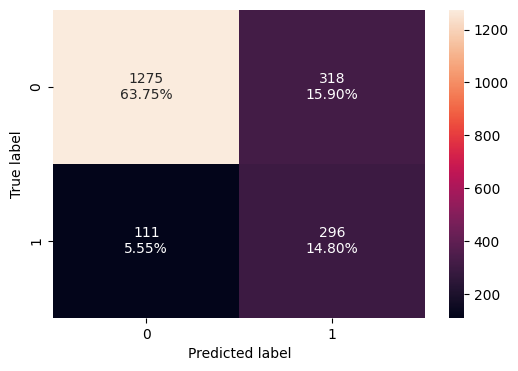

In [224]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

* This model predicts that 5.55% of customers will have exited without bank intervention
* Train Recall : 0.79
* Validation Recall: 0.72
* Test Recall: 0.73
* This model has done exceptionally well with Test actually doing slightly better than Validation!

## Actionable Insights and Business Recommendations

* Use final model (Model 5 - NN with Adam + SMOTE) on customer data to identify customers who will exit - For the identified customers, offer some type of incentive to retain their business.
* Identify why customers are churning at a higher rate in Germany.
* Investigate why customers tend to leave after 2 products
* Provide incentives for new customers (< 1year) and tenured customers (>10 years)
* Figure out a way to get customers to engage more as more engagement leads to staying with the bank.

<font size=6 color='blue'>Power Ahead</font>
___